<a href="https://colab.research.google.com/github/Niluferkk/DSML-PROJECT/blob/main/model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Load data
data = pd.read_csv('online_sales_dataset.csv')


In [12]:
# Select features and target
X = data.drop(columns=["UnitPrice", "InvoiceNo", "Description", "InvoiceDate", "CustomerID"])
y = data["UnitPrice"]

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, columns=["StockCode", "Country", "PaymentMethod", "Category", "SalesChannel", "ReturnStatus", "ShipmentProvider", "WarehouseLocation", "OrderPriority"], dummy_na=False)

# Fill missing values with 0
X = X.fillna(0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),

}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))
    print(f"{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

Linear Regression
RMSE: 48.9258
R² Score: -0.1187

Ridge Regression
RMSE: 48.9138
R² Score: -0.1181

Lasso Regression
RMSE: 48.8546
R² Score: -0.1154

Decision Tree
RMSE: 61.4370
R² Score: -0.7640

Random Forest
RMSE: 50.0347
R² Score: -0.1700



In [21]:
best_model = min(results, key=lambda x: x[1])
print(f"Best Model: {best_model[0]} with RMSE = {best_model[1]:.4f}, R² = {best_model[2]:.4f}")

Best Model: Lasso Regression with RMSE = 48.8546, R² = -0.1154


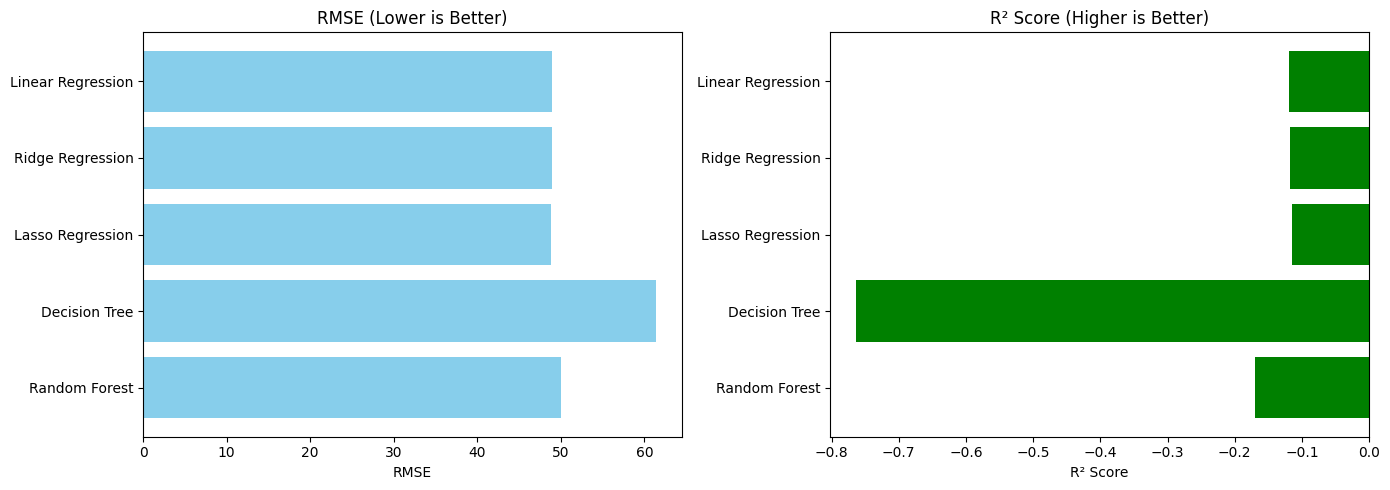

In [22]:
model_names = [name for name, rmse, r2 in results]
rmse_scores = [rmse for name, rmse, r2 in results]
r2_scores = [r2 for name, rmse, r2 in results]


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.barh(model_names, rmse_scores, color='skyblue')
plt.title("RMSE (Lower is Better)")
plt.xlabel("RMSE")
plt.gca().invert_yaxis()


plt.subplot(1, 2, 2)
plt.barh(model_names, r2_scores, color='green')
plt.title("R² Score (Higher is Better)")
plt.xlabel("R² Score")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
